In [24]:
import pandas as pd
import matplotlib.pyplot as plt

from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# 1. Load dataset

In [25]:
df = pd.read_csv(r'..\..\data\predictive_modeling.csv')
df.head(10)

,date,fpt_stock_price_log_return_scaled,market_cap_log_return,fpt_stock_price_log_return,gdp_value,cpi_rate,fpt_stock_price,fpt_stock_volume_log_return,fpt_net_revenue_log_return,usd_vnd_rate_log_return,xau_usd_rate_log_return
0,2020-01-01,-0.055765,0.0,0.000000,3.466157e+11,0.0643,21.39,0.000000,0.0,0.000194,0.009066
1,2020-01-02,-0.055765,0.0,0.000000,3.466157e+11,0.0643,21.39,0.000000,0.0,0.000194,0.009066
2,2020-01-03,-1.040504,0.0,-0.016974,3.466157e+11,0.0643,21.03,0.825817,0.0,-0.000043,0.014361
3,2020-01-06,-0.665883,0.0,-0.010516,3.466157e+11,0.0643,20.81,-0.629106,0.0,0.000151,0.018648
4,2020-01-07,1.048811,0.0,0.019039,3.466157e+11,0.0643,21.21,-0.265344,0.0,0.000043,-0.003361
5,2020-01-08,-1.383803,0.0,-0.022891,3.466157e+11,0.0643,20.73,0.773339,0.0,0.000086,0.021090
6,2020-01-09,0.777814,0.0,0.014368,3.466157e+11,0.0643,21.03,-0.629199,0.0,-0.000043,-0.031317
7,2020-01-10,-0.166219,0.0,-0.001904,3.466157e+11,0.0643,20.99,0.051983,0.0,0.001078,0.001191
8,2020-01-13,-0.471852,0.0,-0.007172,3.466157e+11,0.0643,20.84,-0.258310,0.0,-0.001207,-0.000570
9,2020-01-14,-0.139342,0.0,-0.001441,3.466157e+11,0.0643,20.81,-0.086341,0.0,0.000022,-0.008679


In [26]:
train, test = train_test_split(df, test_size=0.15, shuffle=False)

In [27]:
print(type(train))
train

<class 'pandas.core.frame.DataFrame'>


,date,fpt_stock_price_log_return_scaled,market_cap_log_return,fpt_stock_price_log_return,gdp_value,cpi_rate,fpt_stock_price,fpt_stock_volume_log_return,fpt_net_revenue_log_return,usd_vnd_rate_log_return,xau_usd_rate_log_return
0,2020-01-01,-0.055765,0.0,0.000000,3.466157e+11,0.0643,21.39,0.000000,0.0,0.000194,0.009066
1,2020-01-02,-0.055765,0.0,0.000000,3.466157e+11,0.0643,21.39,0.000000,0.0,0.000194,0.009066
2,2020-01-03,-1.040504,0.0,-0.016974,3.466157e+11,0.0643,21.03,0.825817,0.0,-0.000043,0.014361
3,2020-01-06,-0.665883,0.0,-0.010516,3.466157e+11,0.0643,20.81,-0.629106,0.0,0.000151,0.018648
4,2020-01-07,1.048811,0.0,0.019039,3.466157e+11,0.0643,21.21,-0.265344,0.0,0.000043,-0.003361
...,...,...,...,...,...,...,...,...,...,...,...
1294,2024-11-12,-0.686274,0.0,-0.010868,4.338577e+11,0.0289,117.14,-0.595789,0.0,0.000986,-0.022309
1295,2024-11-13,0.363696,0.0,0.007230,4.338577e+11,0.0289,117.99,0.169359,0.0,0.000237,-0.003153
1296,2024-11-14,-0.817974,0.0,-0.013138,4.338577e+11,0.0289,116.45,0.315304,0.0,0.001635,-0.014368
1297,2024-11-15,-0.959539,0.0,-0.015578,4.338577e+11,0.0289,114.65,0.326372,0.0,-0.000295,-0.002140


In [28]:
test

,date,fpt_stock_price_log_return_scaled,market_cap_log_return,fpt_stock_price_log_return,gdp_value,cpi_rate,fpt_stock_price,fpt_stock_volume_log_return,fpt_net_revenue_log_return,usd_vnd_rate_log_return,xau_usd_rate_log_return
1299,2024-11-19,-1.816531,0.0,-0.030350,4.338577e+11,0.0289,111.31,0.671275,0.0,0.000000,0.009332
1300,2024-11-20,1.008117,0.0,0.018338,4.338577e+11,0.0289,113.37,0.101947,0.0,0.000295,0.005971
1301,2024-11-21,0.204638,0.0,0.004488,4.338577e+11,0.0289,113.88,-0.979133,0.0,0.000354,0.006890
1302,2024-11-22,0.335191,0.0,0.006739,4.338577e+11,0.0289,114.65,-0.085979,0.0,-0.000059,0.014499
1303,2024-11-25,-0.055765,0.0,0.000000,4.338577e+11,0.0289,114.65,-0.453980,0.0,-0.000295,0.003136
...,...,...,...,...,...,...,...,...,...,...,...
1524,2025-09-24,0.825509,0.0,0.015190,4.763882e+11,0.0324,99.50,-0.902093,0.0,-0.000151,-0.003057
1525,2025-09-25,-0.937040,0.0,-0.015190,4.763882e+11,0.0324,98.00,0.150651,0.0,-0.000151,-0.004742
1526,2025-09-26,-0.352523,0.0,-0.005115,4.763882e+11,0.0324,97.50,-0.065487,0.0,-0.000208,0.005890
1527,2025-09-29,-1.258215,0.0,-0.020726,4.763882e+11,0.0324,95.50,0.255282,0.0,0.000416,0.013310


In [29]:
scaler_fpt = StandardScaler()
scaler_gdp = StandardScaler()

def process_data(dataset, is_train=True):
    df_out = dataset.copy()
    
    col_fpt = ['fpt_stock_price']
    col_gdp = ['gdp_value']

    if is_train:
        df_out[col_fpt] = scaler_fpt.fit_transform(df_out[col_fpt])
        df_out[col_gdp] = scaler_gdp.fit_transform(df_out[col_gdp])
    else:
        df_out[col_fpt] = scaler_fpt.transform(df_out[col_fpt])
        df_out[col_gdp] = scaler_gdp.transform(df_out[col_gdp])
        
    return df_out

In [30]:
train_scaled = process_data(train, is_train=True)
test_scaled = process_data(test, is_train=False)

In [31]:
train_scaled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1299 entries, 0 to 1298
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   date                               1299 non-null   object 
 1   fpt_stock_price_log_return_scaled  1299 non-null   float64
 2   market_cap_log_return              1299 non-null   float64
 3   fpt_stock_price_log_return         1299 non-null   float64
 4   gdp_value                          1299 non-null   float64
 5   cpi_rate                           1299 non-null   float64
 6   fpt_stock_price                    1299 non-null   float64
 7   fpt_stock_volume_log_return        1299 non-null   float64
 8   fpt_net_revenue_log_return         1299 non-null   float64
 9   usd_vnd_rate_log_return            1299 non-null   float64
 10  xau_usd_rate_log_return            1299 non-null   float64
dtypes: float64(10), object(1)
memory usage: 121.8+ KB


# 2. Train with XGBoost

## 2.1. Prepare

In [32]:
model_xgboost = XGBRegressor(
    n_estimators=5000,              # TĂNG: Số cây tối đa (vì tốc độ học giảm)
    learning_rate=0.01,             # GIẢM SÂU: Từ 0.05 xuống 0.01 (QUAN TRỌNG NHẤT)
    random_state=42, 
    n_jobs=-1,
    # -------------- TĂNG ĐIỀU CHỈNH CHỐNG OVERFITTING --------------
    max_depth=4,                    # Tăng lại 1 chút để model có đủ khả năng học
    min_child_weight=10,            # Giữ mức phạt cao
    subsample=0.7,                  # Chỉ dùng 70% hàng (Randomness)
    colsample_bytree=0.7,           # Chỉ dùng 70% cột (Randomness)
    gamma=0.5,                      # Thêm phạt cho mỗi lần phân tách (regularization)
    reg_alpha=0.3,                  # TĂNG: Điều chuẩn L1
    reg_lambda=0.3,                 # TĂNG: Điều chuẩn L2
    early_stopping_rounds=150       # Tăng rounds để cho model thời gian tìm điểm dừng
)

print("Đã khởi tạo mô hình mới với tốc độ học rất chậm và điều chuẩn mạnh.")

Đã khởi tạo mô hình mới với tốc độ học rất chậm và điều chuẩn mạnh.


In [33]:
LAG_FEATURES = ['fpt_stock_price', 'fpt_stock_volume_log_return']

LAG_DAYS = [1, 2]

for feature in LAG_FEATURES:
    for lag in LAG_DAYS:
        df[f'{feature}_lag{lag}'] = df[feature].shift(lag)

df_lagged = df.dropna()

df_lagged['date'] = pd.to_datetime(df_lagged['date'])
df_lagged = df_lagged.set_index('date')


print("--- DataFrame sau khi tạo Lagged Features ---")
print(df_lagged.head())

scaler_fpt = StandardScaler()
scaler_gdp = StandardScaler() # Giữ lại scaler cho các cột khác

train_lagged, test_lagged = train_test_split(df_lagged, test_size=0.15, shuffle=False)

train_scaled = process_data(train_lagged, is_train=True)
test_scaled = process_data(test_lagged, is_train=False)



--- DataFrame sau khi tạo Lagged Features ---
            fpt_stock_price_log_return_scaled  market_cap_log_return  \
date                                                                   
2020-01-03                          -1.040504                    0.0   
2020-01-06                          -0.665883                    0.0   
2020-01-07                           1.048811                    0.0   
2020-01-08                          -1.383803                    0.0   
2020-01-09                           0.777814                    0.0   

            fpt_stock_price_log_return     gdp_value  cpi_rate  \
date                                                             
2020-01-03                   -0.016974  3.466157e+11    0.0643   
2020-01-06                   -0.010516  3.466157e+11    0.0643   
2020-01-07                    0.019039  3.466157e+11    0.0643   
2020-01-08                   -0.022891  3.466157e+11    0.0643   
2020-01-09                    0.014368  3.466157e+11 

C:\Users\VICTUS\AppData\Local\Temp\ipykernel_14872\2660760093.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_lagged['date'] = pd.to_datetime(df_lagged['date'])


In [34]:
TARGET_COL = 'fpt_stock_price' 

y_train_scaled = train_scaled[TARGET_COL]
X_train_scaled = train_scaled.drop(columns=[TARGET_COL, 'fpt_stock_price_log_return'])

y_test_scaled = test_scaled[TARGET_COL]
X_test_scaled = test_scaled.drop(columns=[TARGET_COL, 'fpt_stock_price_log_return'])

In [35]:
y_train_scaled

date
2020-01-03   -1.209141
2020-01-06   -1.217416
2020-01-07   -1.202371
2020-01-08   -1.220426
2020-01-09   -1.209141
                ...   
2024-11-12    2.405994
2024-11-13    2.437966
2024-11-14    2.380040
2024-11-15    2.312334
2024-11-18    2.315719
Name: fpt_stock_price, Length: 1297, dtype: float64

In [36]:
X_train_scaled

,fpt_stock_price_log_return_scaled,market_cap_log_return,gdp_value,cpi_rate,fpt_stock_volume_log_return,fpt_net_revenue_log_return,usd_vnd_rate_log_return,xau_usd_rate_log_return,fpt_stock_price_lag1,fpt_stock_price_lag2,fpt_stock_volume_log_return_lag1,fpt_stock_volume_log_return_lag2
date,,,,,,,,,,,,
2020-01-03,-1.040504,0.0,-0.953595,0.0643,0.825817,0.0,-0.000043,0.014361,21.39,21.39,0.000000,0.000000
2020-01-06,-0.665883,0.0,-0.953595,0.0643,-0.629106,0.0,0.000151,0.018648,21.03,21.39,0.825817,0.000000
2020-01-07,1.048811,0.0,-0.953595,0.0643,-0.265344,0.0,0.000043,-0.003361,20.81,21.03,-0.629106,0.825817
2020-01-08,-1.383803,0.0,-0.953595,0.0643,0.773339,0.0,0.000086,0.021090,21.21,20.81,-0.265344,-0.629106
2020-01-09,0.777814,0.0,-0.953595,0.0643,-0.629199,0.0,-0.000043,-0.031317,20.73,21.21,0.773339,-0.265344
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-12,-0.686274,0.0,1.512026,0.0289,-0.595789,0.0,0.000986,-0.022309,118.42,116.28,0.920889,-0.528242
2024-11-13,0.363696,0.0,1.512026,0.0289,0.169359,0.0,0.000237,-0.003153,117.14,118.42,-0.595789,0.920889
2024-11-14,-0.817974,0.0,1.512026,0.0289,0.315304,0.0,0.001635,-0.014368,117.99,117.14,0.169359,-0.595789


## 2.2. Train

In [37]:
eval_set = [(X_test_scaled, y_test_scaled)]

In [38]:
model_xgboost.fit(
    X_train_scaled, 
    y_train_scaled,
    eval_set=eval_set,
    # eval_metric='rmse',
    verbose=True 
)

[0]	validation_0-rmse:2.19133
[1]	validation_0-rmse:2.17149


[2]	validation_0-rmse:2.15191
[3]	validation_0-rmse:2.13242
[4]	validation_0-rmse:2.11301
[5]	validation_0-rmse:2.09413
[6]	validation_0-rmse:2.07540
[7]	validation_0-rmse:2.05685
[8]	validation_0-rmse:2.03816
[9]	validation_0-rmse:2.01998
[10]	validation_0-rmse:2.00194
[11]	validation_0-rmse:1.98393
[12]	validation_0-rmse:1.96639
[13]	validation_0-rmse:1.94895
[14]	validation_0-rmse:1.93549
[15]	validation_0-rmse:1.91767
[16]	validation_0-rmse:1.90085
[17]	validation_0-rmse:1.88381
[18]	validation_0-rmse:1.86659
[19]	validation_0-rmse:1.84998
[20]	validation_0-rmse:1.83283
[21]	validation_0-rmse:1.81662
[22]	validation_0-rmse:1.80053
[23]	validation_0-rmse:1.78473
[24]	validation_0-rmse:1.76908
[25]	validation_0-rmse:1.75362
[26]	validation_0-rmse:1.73826
[27]	validation_0-rmse:1.72305
[28]	validation_0-rmse:1.70808
[29]	validation_0-rmse:1.69309
[30]	validation_0-rmse:1.67825
[31]	validation_0-rmse:1.66297
[32]	validation_0-rmse:1.64800
[33]	validation_0-rmse:1.63303
[34]	validation_

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,0.7
,device,None
,early_stopping_rounds,150
,enable_categorical,False
,eval_metric,None


## 2.3. Predict

In [39]:
X_test_scaled.head(3)

,fpt_stock_price_log_return_scaled,market_cap_log_return,gdp_value,cpi_rate,fpt_stock_volume_log_return,fpt_net_revenue_log_return,usd_vnd_rate_log_return,xau_usd_rate_log_return,fpt_stock_price_lag1,fpt_stock_price_lag2,fpt_stock_volume_log_return_lag1,fpt_stock_volume_log_return_lag2
date,,,,,,,,,,,,
2024-11-19,-1.816531,0.0,1.512026,0.0289,0.671275,0.0,0.000000,0.009332,114.74,114.65,-0.519400,0.326372
2024-11-20,1.008117,0.0,1.512026,0.0289,0.101947,0.0,0.000295,0.005971,111.31,114.74,0.671275,-0.519400
2024-11-21,0.204638,0.0,1.512026,0.0289,-0.979133,0.0,0.000354,0.006890,113.37,111.31,0.101947,0.671275


In [40]:
y_train_pred_scaled = model_xgboost.predict(X_train_scaled)
y_pred_scaled = model_xgboost.predict(X_test_scaled)
print("Đã dự đoán thành công. Kết quả là các giá trị đã được scale.")

Đã dự đoán thành công. Kết quả là các giá trị đã được scale.


In [41]:
scaler_target = scaler_fpt

y_train_pred_actual = scaler_target.inverse_transform(y_train_pred_scaled.reshape(-1, 1)).flatten()
y_pred_actual = scaler_target.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_test_actual = scaler_target.inverse_transform(y_test_scaled.values.reshape(-1, 1)).flatten()

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mae = mean_absolute_error(y_test_actual, y_pred_actual)

print(f"Giá trị RMSE (Lỗi trung bình bình phương gốc)  : {rmse:.2f}")
print(f"Giá trị MAE (Lỗi tuyệt đối trung bình)         : {mae:.2f}")

Giá trị RMSE (Lỗi trung bình bình phương gốc)  : 8.53
Giá trị MAE (Lỗi tuyệt đối trung bình)         : 5.95


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mae = mean_absolute_error(y_test_actual, y_pred_actual)

def calculate_r2(y_actual, y_predicted):
    """
    Tính toán Hệ số Xác định R-squared.

    Args:
        y_actual (np.ndarray): Mảng giá trị thực tế (Actual).
        y_predicted (np.ndarray): Mảng giá trị dự đoán (Predicted).

    Returns:
        float: Giá trị R-squared.
    """
    y_actual_flat = y_actual.flatten()
    y_predicted_flat = y_predicted.flatten()
    r2 = r2_score(y_actual_flat, y_predicted_flat)
    
    return r2
r2_value = calculate_r2(y_test_actual, y_pred_actual)

print(f"Giá trị RMSE (Lỗi trung bình bình phương gốc)  : {rmse:.2f}")
print(f"Giá trị MAE (Lỗi tuyệt đối trung bình)         : {mae:.2f}")
print(f"Giá trị R-squared                              : {r2_value:.4f}")

Giá trị RMSE (Lỗi trung bình bình phương gốc)  : 8.53
Giá trị MAE (Lỗi tuyệt đối trung bình)         : 5.95
Giá trị R-squared                              : 0.4976


In [45]:
y_train_actual = scaler_target.inverse_transform(y_train_scaled.values.reshape(-1, 1)).flatten()
train_results_df = pd.DataFrame(
    data={
        'Actual Price': y_train_actual.flatten(),
        'Predicted Price': y_train_pred_actual.flatten()
    },
    index=X_train_scaled.index
)
test_results_df = pd.DataFrame(
    data={
        'Actual Price': y_test_actual.flatten(),
        'Predicted Price': y_pred_actual.flatten()
    },
    index=X_test_scaled.index
)

In [46]:
DAYS_TO_SHOW = 150 
recent_train_results_df = train_results_df.iloc[-DAYS_TO_SHOW:]
full_results_df_recent = pd.concat([recent_train_results_df, test_results_df])

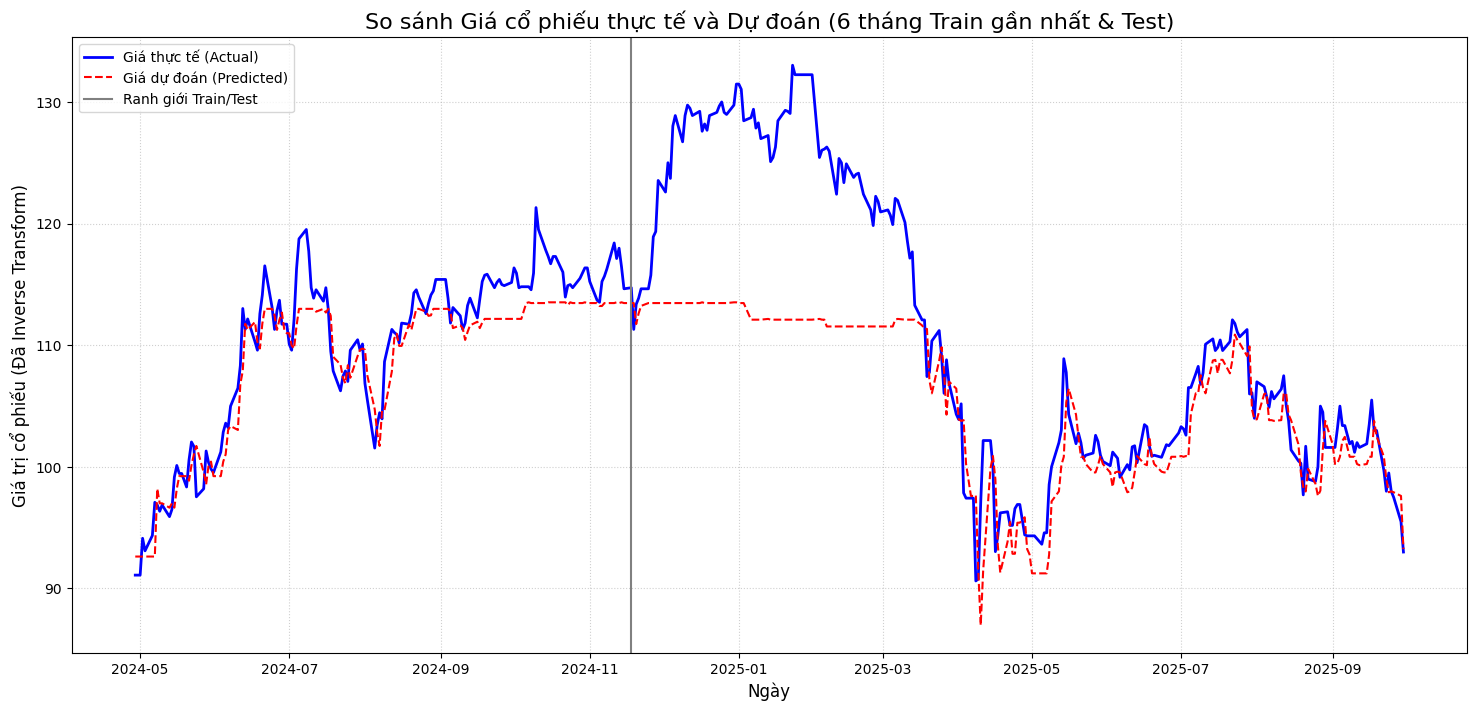

In [47]:
plt.figure(figsize=(18, 8))

plt.plot(full_results_df_recent.index, full_results_df_recent['Actual Price'], 
         label='Giá thực tế (Actual)', color='blue', linewidth=2)

plt.plot(full_results_df_recent.index, full_results_df_recent['Predicted Price'], 
         label='Giá dự đoán (Predicted)', color='red', linestyle='--', linewidth=1.5)

split_index_loc = X_train_scaled.index[-1]
plt.axvline(x=split_index_loc, color='gray', linestyle='-', linewidth=1.5, label='Ranh giới Train/Test')

plt.title('So sánh Giá cổ phiếu thực tế và Dự đoán (6 tháng Train gần nhất & Test)', fontsize=16)
plt.xlabel('Ngày', fontsize=12)
plt.ylabel('Giá trị cổ phiếu (Đã Inverse Transform)', fontsize=12)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, linestyle=':', alpha=0.6)

plt.show()